###  notebook of a cnn to clasify dogs_cats

In [20]:
import numpy as np 
import matplotlib.pyplot as plt
import os 
import cv2
from shutil import copyfile
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , Activation , Flatten , Conv2D , MaxPooling2D ,Dropout

In [18]:
DATA_DIR = "/Users/yoavger/data_for_ml/cat_dog"
CATEGORIES = ['cat','dog']
IMG_SIZE = 100
# cv2.IMREAD_GRAYSCALE
traning_data = []

def creat_training_data():
    # this funcation creat the data set
    for category in CATEGORIES:
        path = os.path.join(DATA_DIR,category)
        class_num = CATEGORIES.index(category)
        counter = 0
        for img in os.listdir(path):
            if (category == 'dog'):
                counter += 1
                if counter > 2500: 
                    break
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                traning_data.append([new_array,class_num])
            except Exception as e:
                pass
        

creat_training_data()

In [24]:
# randomize data 
random.shuffle(traning_data)

In [25]:
# create two arrays X for the instencies , y for the labels 
X = []
y = []

for features , label in traning_data:
    X.append(features)
    y.append(label)

In [26]:
# normalize data 
X = np.array(X).reshape(-1 ,IMG_SIZE ,IMG_SIZE,3)
y = np.array(y)
X = X/255.0

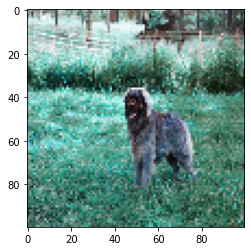

In [27]:
plt.imshow(X[0])
plt.show()

In [31]:
# creat a cnn model for traning 
model = Sequential()

model.add(Conv2D(32,(3,3), activation = 'relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Dropout(.2))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10))

model.add(Dense(1,activation = 'sigmoid'))


model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

history = model.fit(X, y, batch_size = 32 ,epochs = 10, validation_split = 0.1)

Epoch 1/10
138/138 [==============================] - 21s 153ms/step - loss: 0.6590 - accuracy: 0.5919 - val_loss: 0.6566 - val_accuracy: 0.6000
Epoch 2/10
138/138 [==============================] - 21s 151ms/step - loss: 0.6021 - accuracy: 0.6784 - val_loss: 0.6030 - val_accuracy: 0.6918
Epoch 3/10
138/138 [==============================] - 21s 154ms/step - loss: 0.5579 - accuracy: 0.7177 - val_loss: 0.5808 - val_accuracy: 0.7143
Epoch 4/10
138/138 [==============================] - 21s 154ms/step - loss: 0.5113 - accuracy: 0.7438 - val_loss: 0.5470 - val_accuracy: 0.7184
Epoch 5/10
138/138 [==============================] - 22s 158ms/step - loss: 0.4737 - accuracy: 0.7761 - val_loss: 0.5099 - val_accuracy: 0.7633
Epoch 6/10
138/138 [==============================] - 26s 189ms/step - loss: 0.4303 - accuracy: 0.7988 - val_loss: 0.4907 - val_accuracy: 0.7735
Epoch 7/10
138/138 [==============================] - 23s 170ms/step - loss: 0.3797 - accuracy: 0.8306 - val_loss: 0.4913 - val_ac

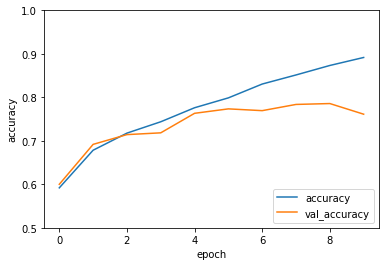

In [32]:
# summarize history for accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

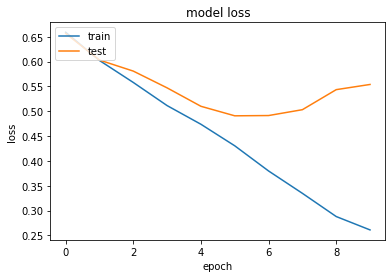

In [33]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
uploader = 'cat1.jpg'

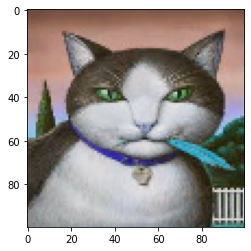

CAT


In [37]:
test_img = cv2.imread(uploader)
test_img = cv2.resize(test_img,(IMG_SIZE,IMG_SIZE))

plt.imshow(test_img)
plt.show()

test_img = np.array(test_img).reshape(-1 ,IMG_SIZE ,IMG_SIZE,3)

test_img = test_img/255.0
label = "DOG" if  model.predict(test_img) > 0.5 else "CAT"
print(label)